In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

**Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/dataset"
os.chdir(Root)

In [ ]:
train ='/content/drive/MyDrive/Colab Notebooks/dataset/train'
test = '/content/drive/MyDrive/Colab Notebooks/dataset/test'
val = '/content/drive/MyDrive/Colab Notebooks/dataset/validate'

**Data Visualization**

Train set:
PNEUMONIA=3946
NORMAL=1371
Test set:
PNEUMONIA=400
NORMAL=244
Validation set:
PNEUMONIA=8
NORMAL=8


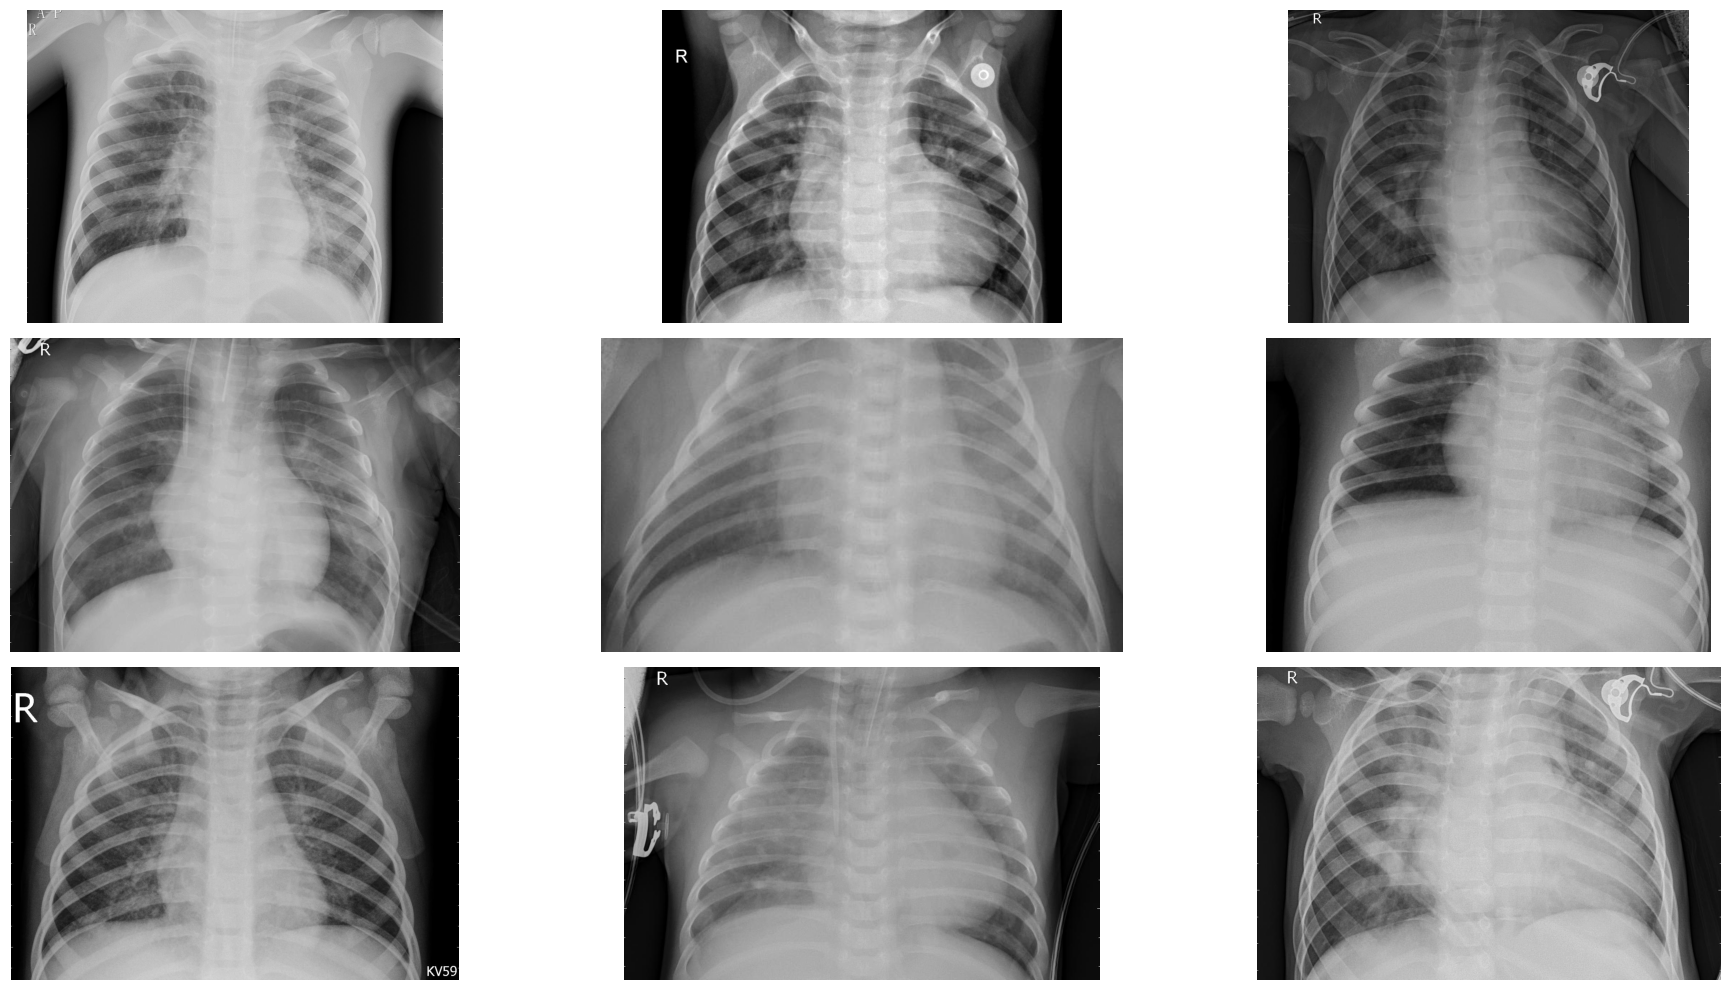

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/dataset/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/dataset/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/dataset/validate"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("/content/drive/MyDrive/Colab Notebooks/dataset/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/Colab Notebooks/dataset/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

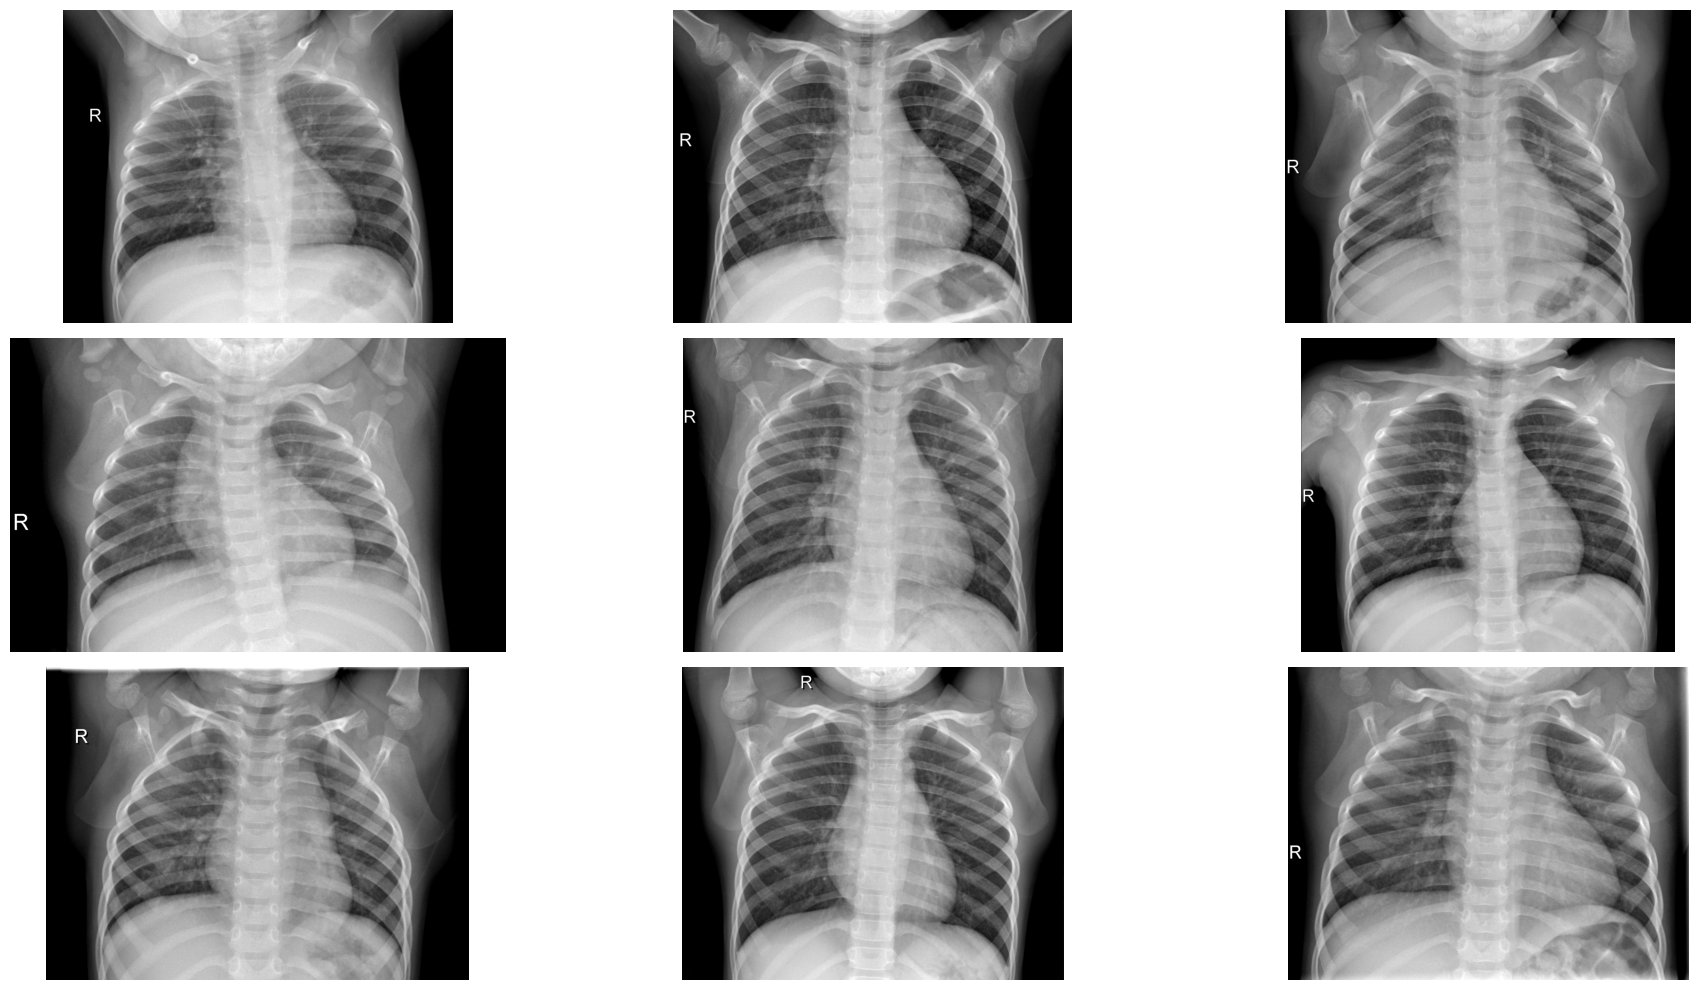

In [ ]:
normal = os.listdir("/content/drive/MyDrive/Colab Notebooks/dataset/train/NORMAL")
normal_dir = "/content/drive/MyDrive/Colab Notebooks/dataset/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 1344 pixels width and 1670 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 118.5887 and the standard deviation is 73.0181


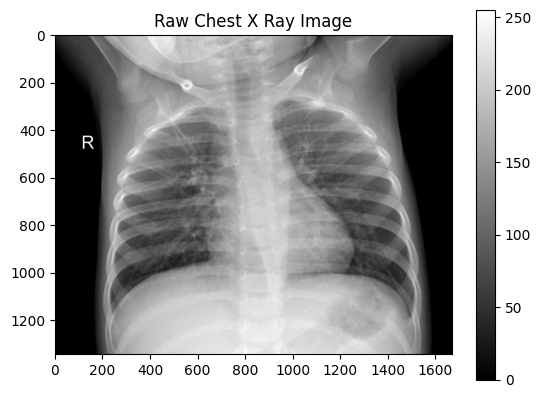

In [ ]:
normal_img = os.listdir("/content/drive/MyDrive/Colab Notebooks/dataset/train/NORMAL")[0]
normal_dir = "/content/drive/MyDrive/Colab Notebooks/dataset/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

**Ivestigate pixel value distribution**

<ipython-input-15-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

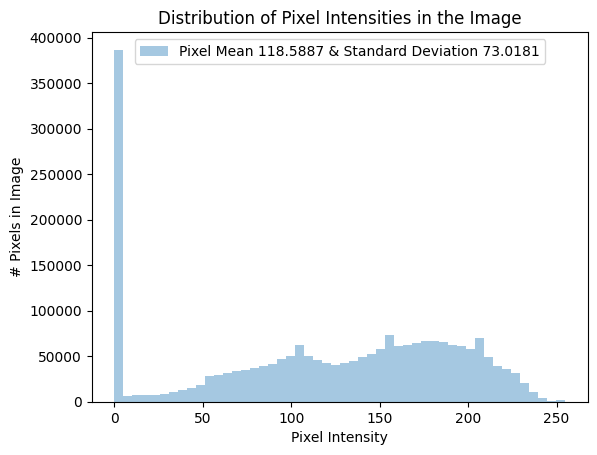

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

**Image Preprocessing**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

**Build a separate generator for valid and test sets**

In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5317 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 644 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.6784 and the minimum is -2.9008
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


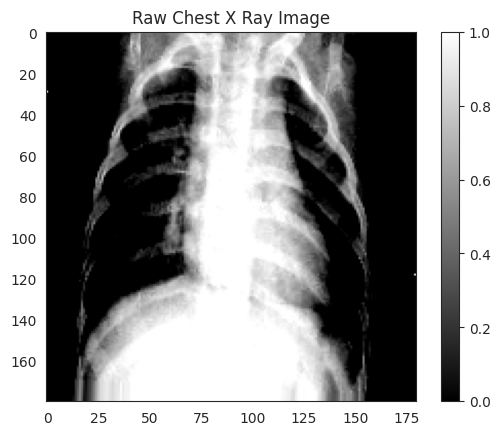

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

<ipython-input-19-3361fab08a7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

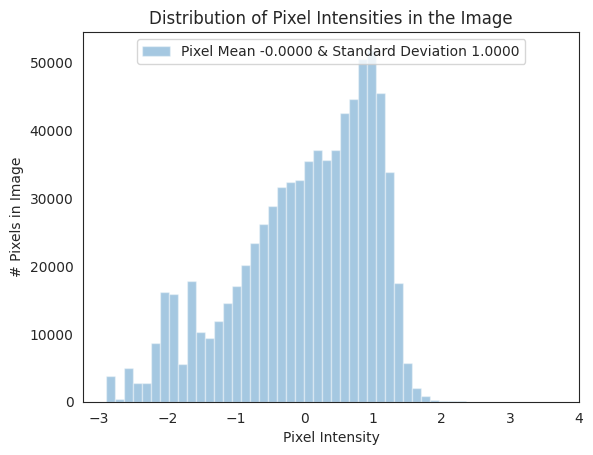

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')


**Building a CNN model**

Impact of imbalance data on loss function


In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 178, 178, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 176, 176, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 32)        0         
 D)                                                              
                                                        

In [ ]:
r = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 6.0499 - accuracy: 0.6250

1/1 [==============================] - 8s 8s/step - loss: 6.0499 - accuracy: 0.6250 - val_loss: 4.1428 - val_accuracy: 0.5625
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 2.1150e-09 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 2.1192 - accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 1.5529 - accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 1.3291 - accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 9.9562e-06 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.8671 - accuracy: 0.6250
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 3.1407 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: 2.9522e-08 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 5s 5s/step - loss: 2.9079e-09 - accuracy: 1.0000


Text(0.5, 1.0, 'Accuracy Evolution')

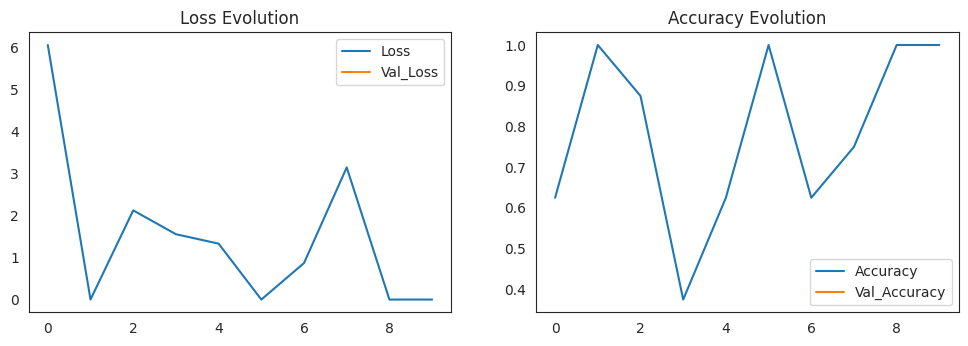

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

644/644 [==============================] - 163s 254ms/step - loss: 1.3435 - accuracy: 0.7966
Test Accuracy: 79.66%
665/665 [==============================] - 1227s 2s/step - loss: 1.4802 - accuracy: 0.8074
Train Accuracy: 80.74%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

644/644 [==============================] - 48s 73ms/step
[[185  59]
 [ 75 325]]


,0,1,accuracy,macro avg,weighted avg
precision,0.711538,0.846354,0.791925,0.778946,0.795275
recall,0.758197,0.812500,0.791925,0.785348,0.791925
f1-score,0.734127,0.829082,0.791925,0.781604,0.793105
support,244.000000,400.000000,0.791925,644.000000,644.000000


In [ ]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[188  56]
 [ 81 319]]


,0,1,accuracy,macro avg,weighted avg
precision,0.698885,0.850667,0.787267,0.774776,0.793159
recall,0.770492,0.797500,0.787267,0.783996,0.787267
f1-score,0.732943,0.823226,0.787267,0.778085,0.789019
support,244.000000,400.000000,0.787267,644.000000,644.000000


In [ ]:
#testing on some images
img = "/content/drive/MyDrive/Colab Notebooks/dataset/test/PNEUMONIA/person1_virus_6.jpeg"
#plt.imshow(img)
#plt.show()
resize = tf.image.resize(img,(256,256,256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5:
    print("This person has pneumonia")
else:
    print("This person does not have pneumonia")

ValueError: ignored